1.DATA COLLECTING

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv('student_depression_dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


2.CHECK BASIC INFO

In [44]:
df.shape

(27901, 18)

In [45]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [47]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

3.CHECK MISSING VALUES

In [48]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [49]:
# Check for any '?' values in the DataFrame
print(df.isin(['?']).sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [50]:
df['Financial Stress'] = df['Financial Stress'].replace('?', np.nan)
df['Financial Stress'] = df['Financial Stress'].fillna(df['Financial Stress'].mode()[0])

NO MISSING VALUES

4.CHECK FOR DUPLICATES

In [51]:
df.duplicated().sum()

np.int64(0)

NO DUPLICATES

DROP IRRELEVANT COLUMNS

In [52]:
df=df.drop(columns=['id','Job Satisfaction','Profession','Work Pressure'])
df.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

5.TYPE CONVERSION

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  object 
 1   Age                                    27901 non-null  float64
 2   City                                   27901 non-null  object 
 3   Academic Pressure                      27901 non-null  float64
 4   CGPA                                   27901 non-null  float64
 5   Study Satisfaction                     27901 non-null  float64
 6   Sleep Duration                         27901 non-null  object 
 7   Dietary Habits                         27901 non-null  object 
 8   Degree                                 27901 non-null  object 
 9   Have you ever had suicidal thoughts ?  27901 non-null  object 
 10  Work/Study Hours                       27901 non-null  float64
 11  Fi

In [54]:
for col in df.select_dtypes(include='object').columns:
    df[col]=df[col].astype('category')
df['Age']=df['Age'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Gender                                 27901 non-null  category
 1   Age                                    27901 non-null  int64   
 2   City                                   27901 non-null  category
 3   Academic Pressure                      27901 non-null  float64 
 4   CGPA                                   27901 non-null  float64 
 5   Study Satisfaction                     27901 non-null  float64 
 6   Sleep Duration                         27901 non-null  category
 7   Dietary Habits                         27901 non-null  category
 8   Degree                                 27901 non-null  category
 9   Have you ever had suicidal thoughts ?  27901 non-null  category
 10  Work/Study Hours                       27901 non-null  flo

In [55]:
#Group rare categories in City
city_counts = df['City'].value_counts()

df['City'] = df['City'].apply(lambda x: x if city_counts[x] >= 10 else 'Other')

# Group rare categories in Sleep Duration
sleep_counts = df['Sleep Duration'].value_counts()
df['Sleep Duration'] = df['Sleep Duration'].apply(lambda x: x if sleep_counts[x] >= 18 else 'Other')

print("Unique values in City:", df['City'].unique())
print("Unique values in Sleep Duration:", df['Sleep Duration'].unique())

Unique values in City: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Other']
Unique values in Sleep Duration: [''5-6 hours'', ''Less than 5 hours'', ''7-8 hours'', ''More than 8 hours'', 'Others']
Categories (5, object): [''5-6 hours'', ''7-8 hours'', ''Less than 5 hours'', ''More than 8 hours'', 'Others']


PLOTTING

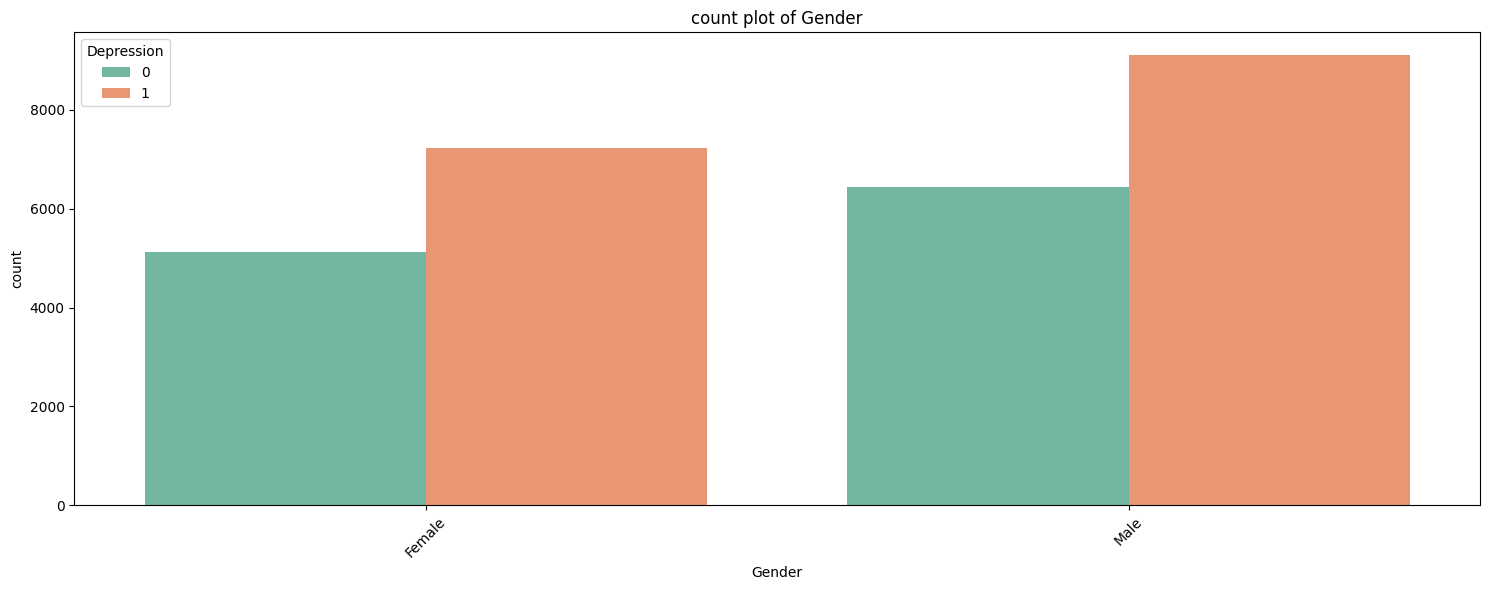

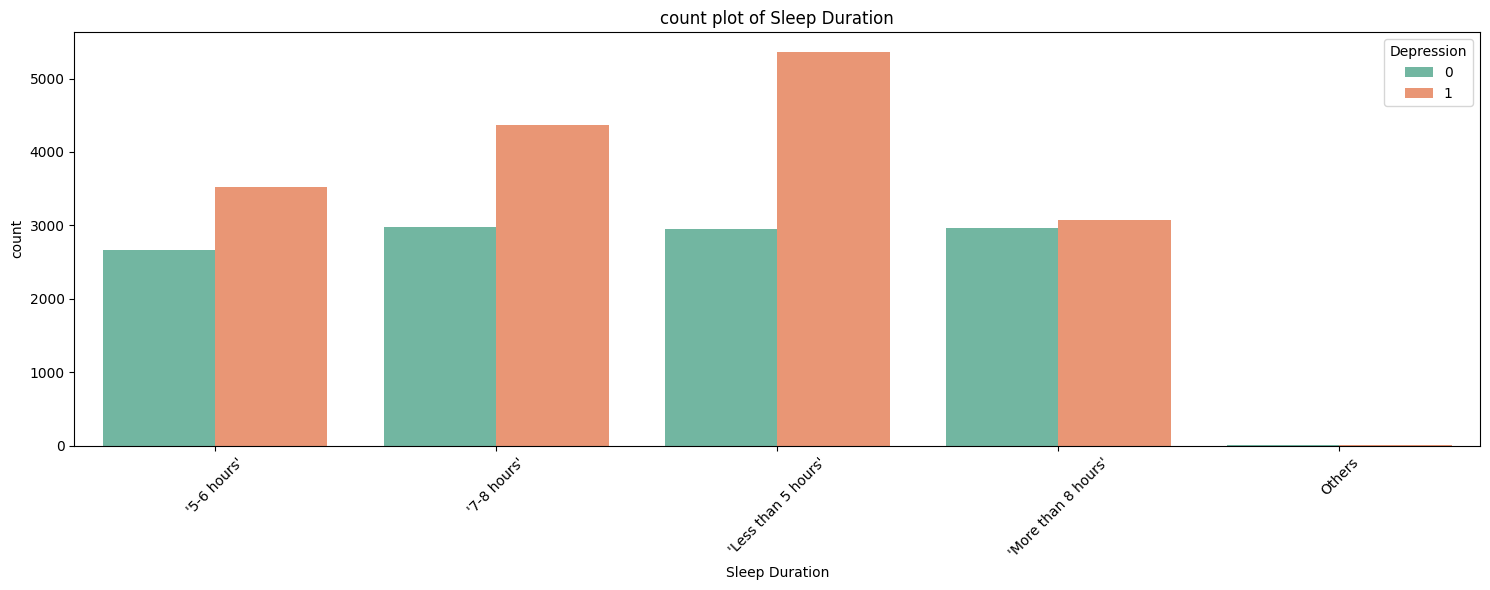

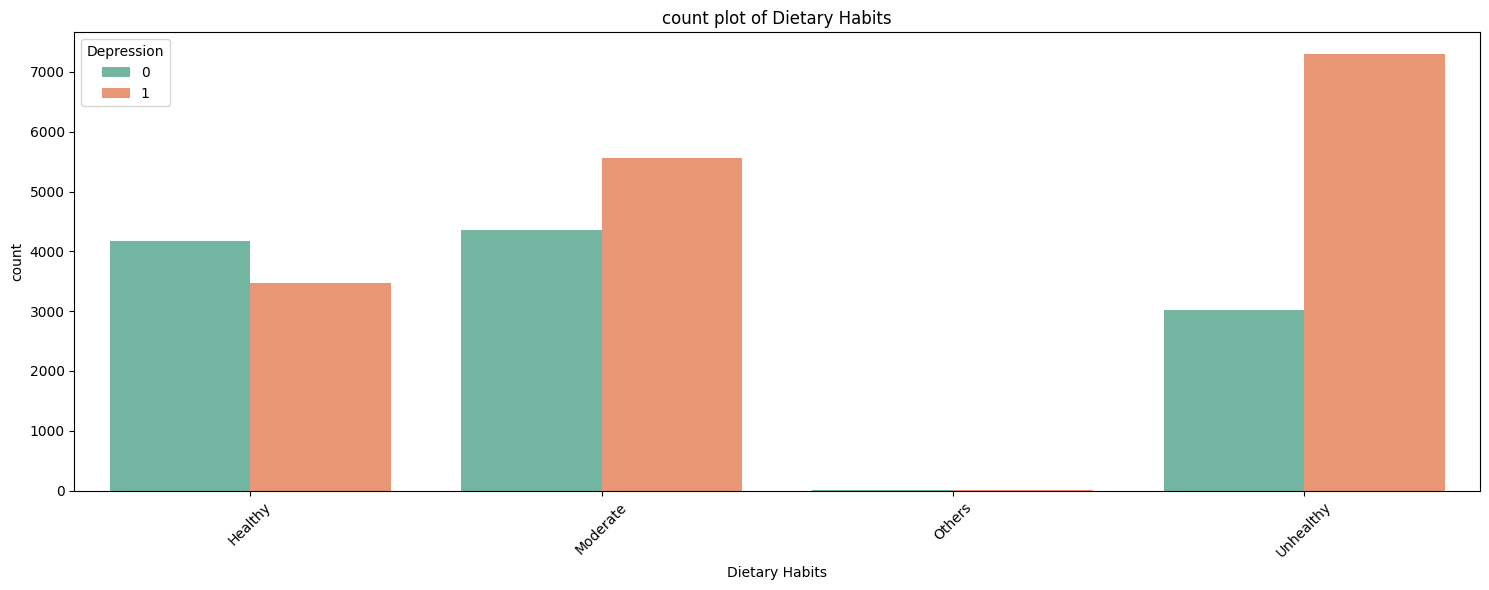

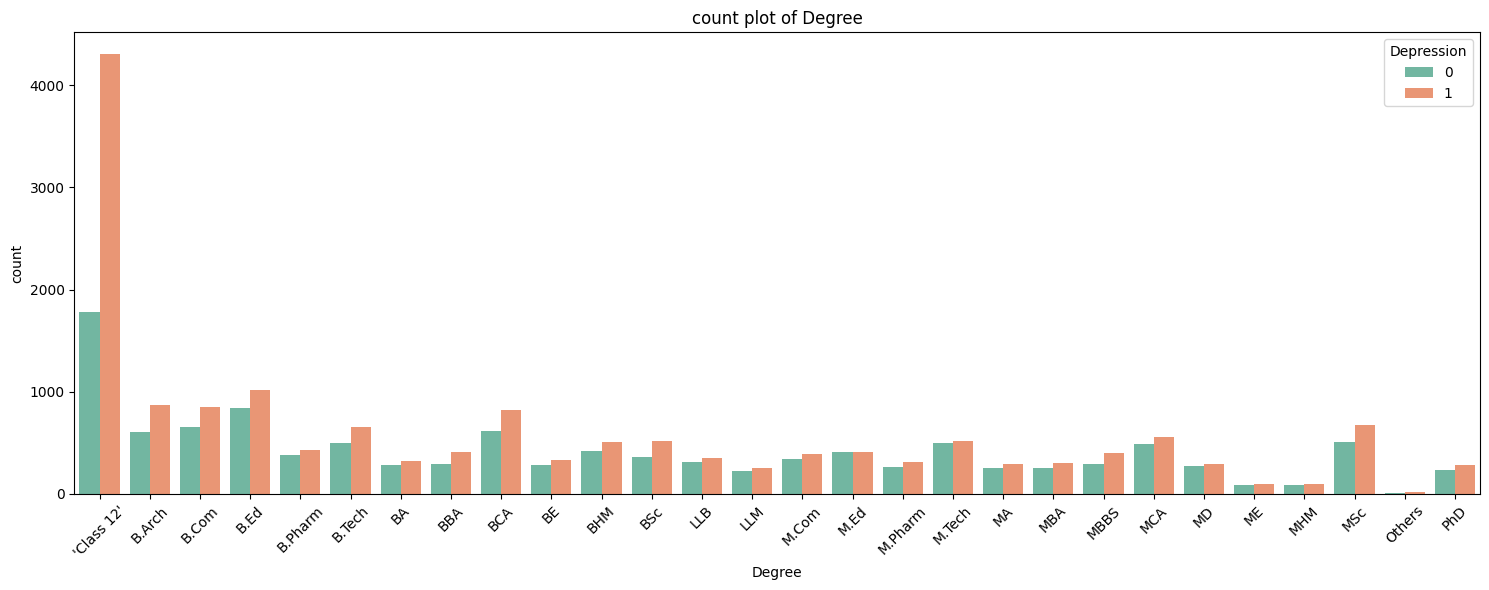

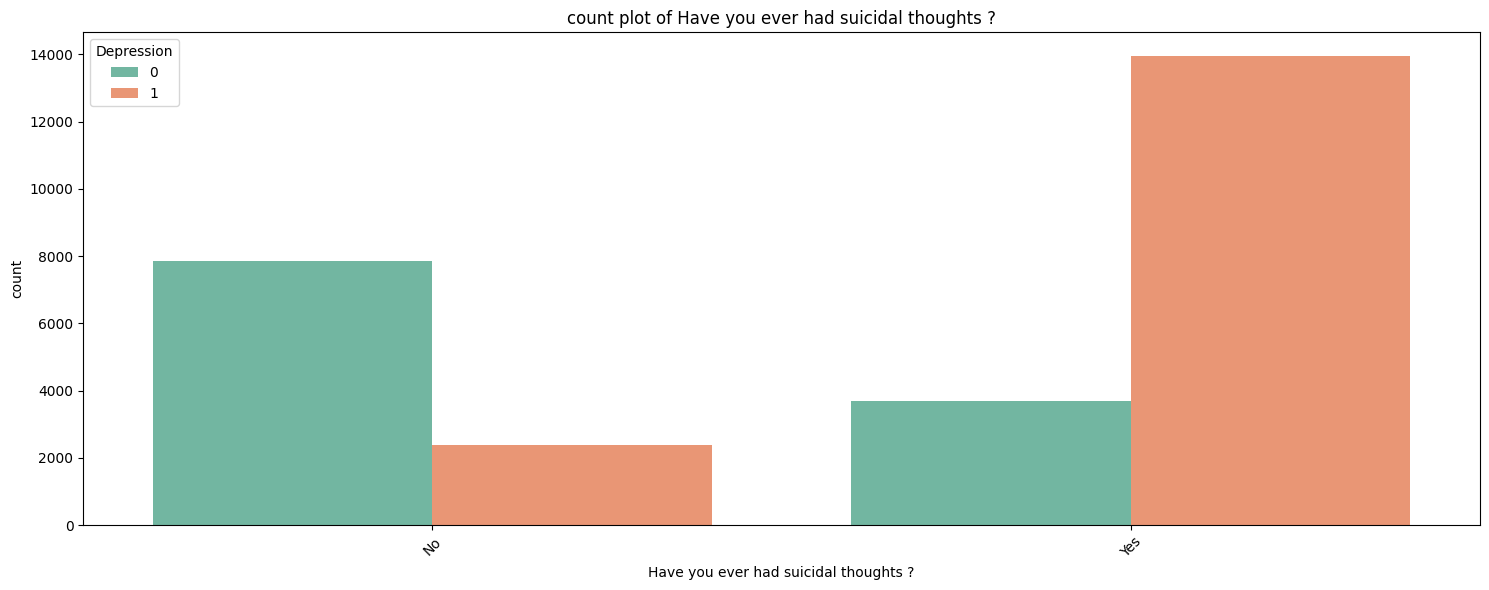

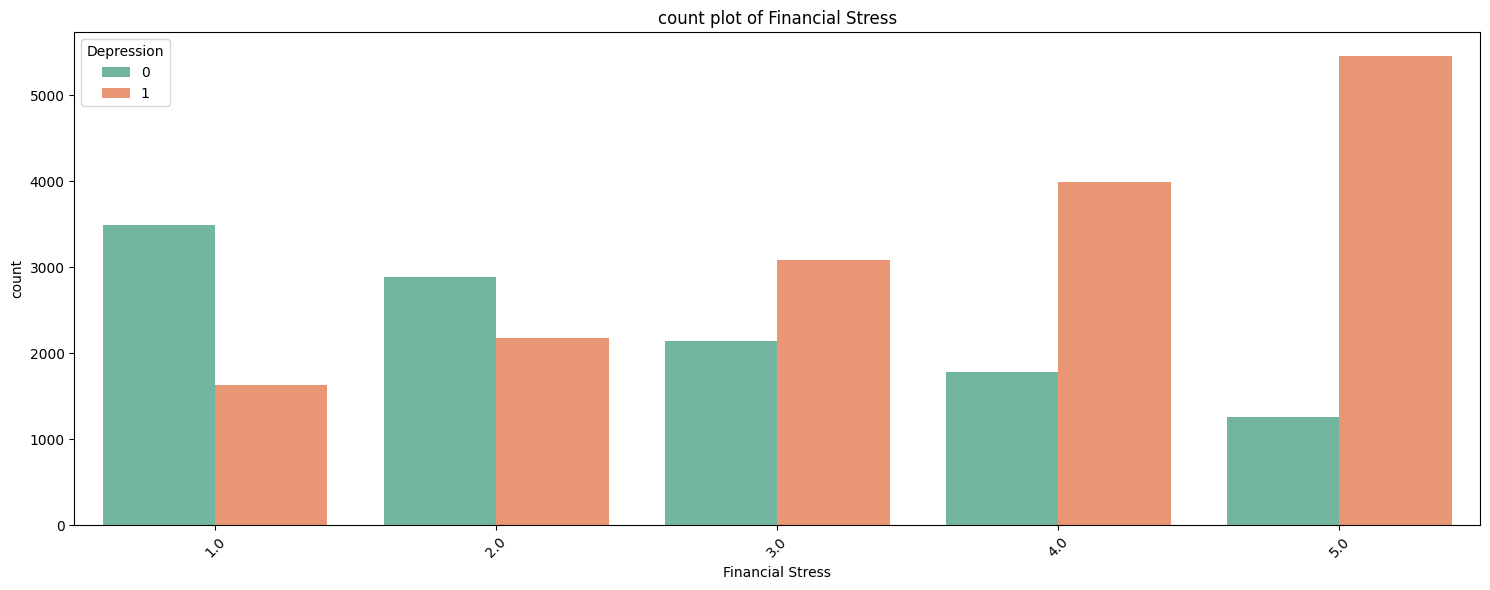

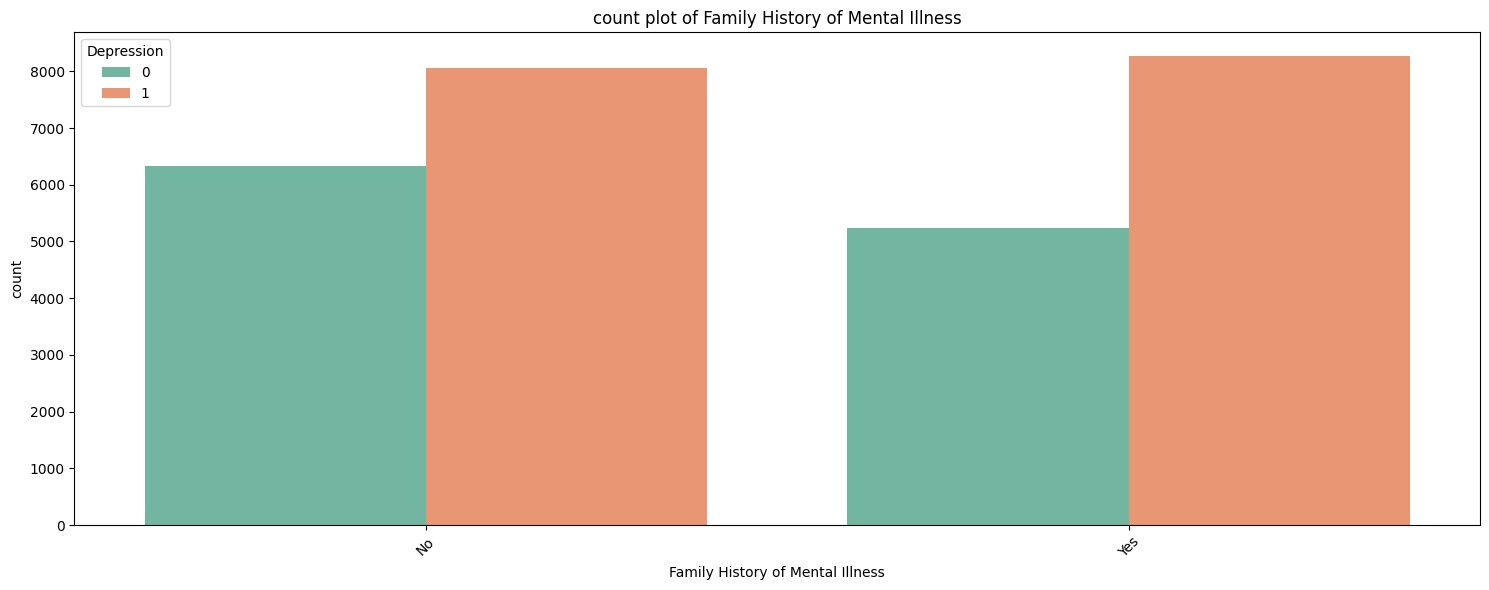

In [56]:
categorial_col=df.select_dtypes(include='category').columns
for col in categorial_col:
    plt.figure(figsize=(15,6))
    sns.countplot(x=col,data=df,hue='Depression',palette='Set2')
    plt.title(f'count plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

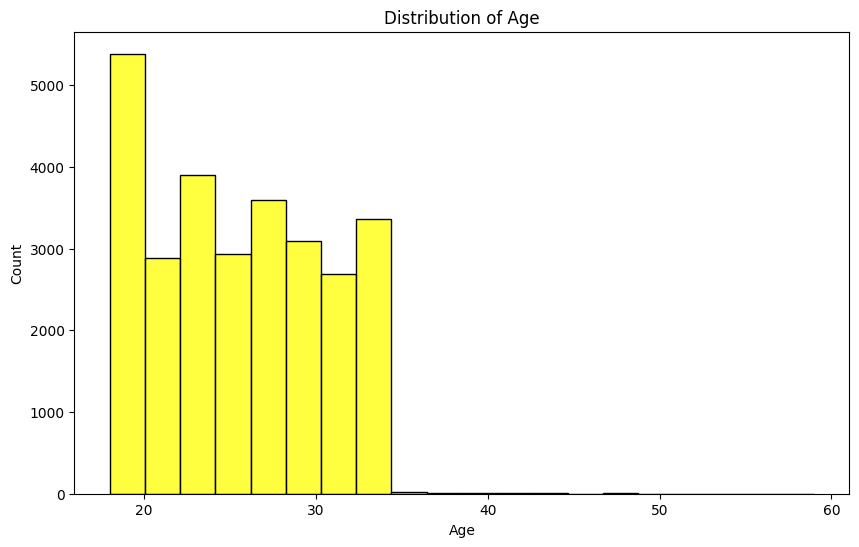

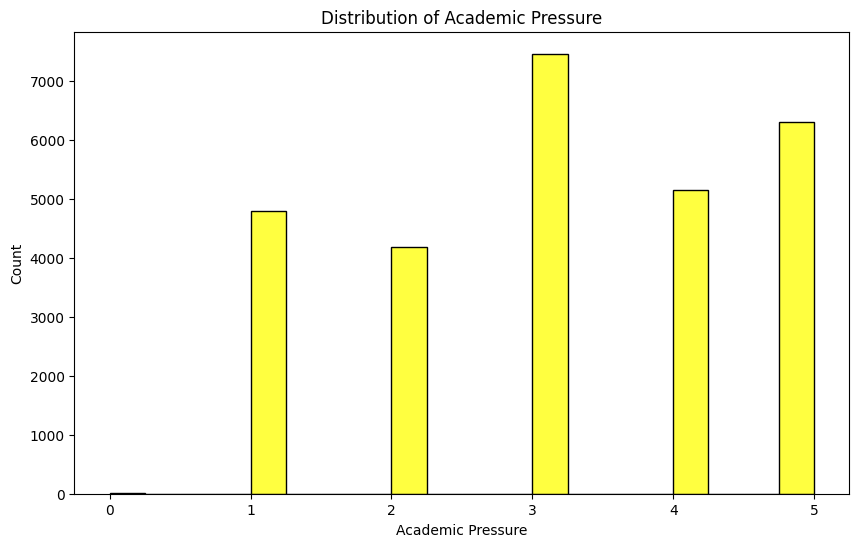

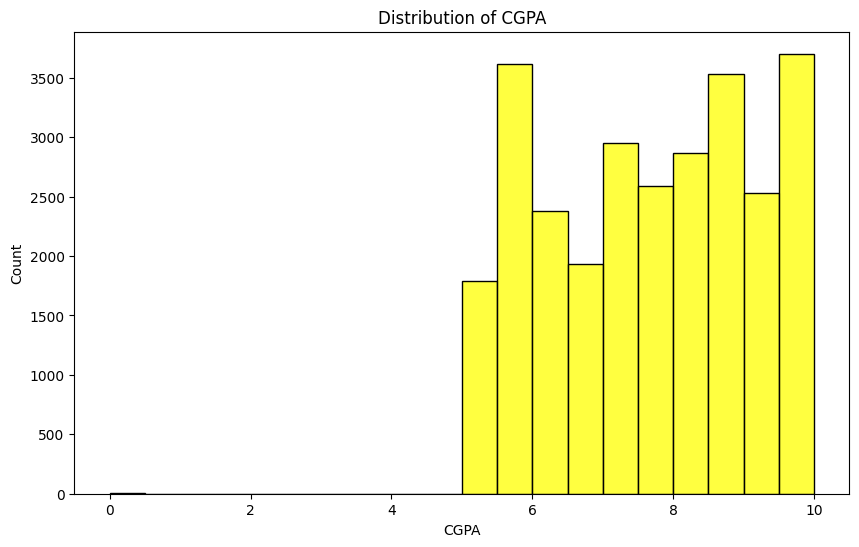

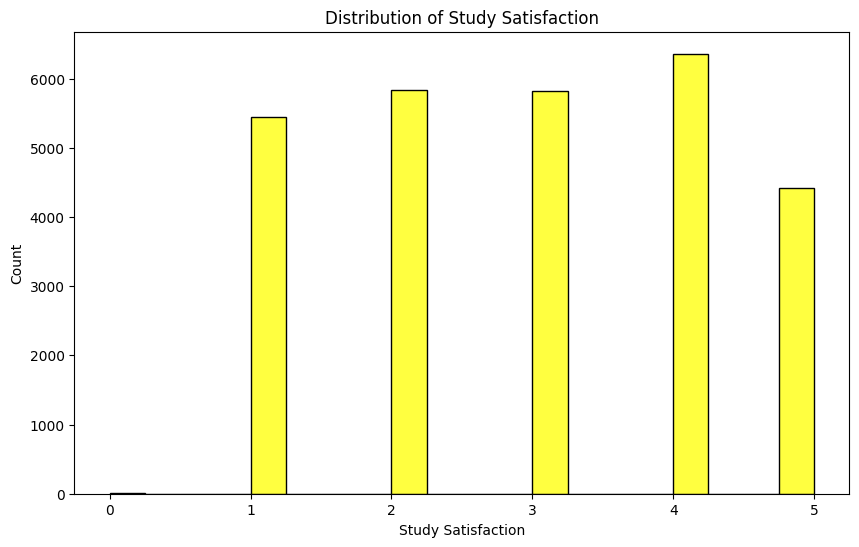

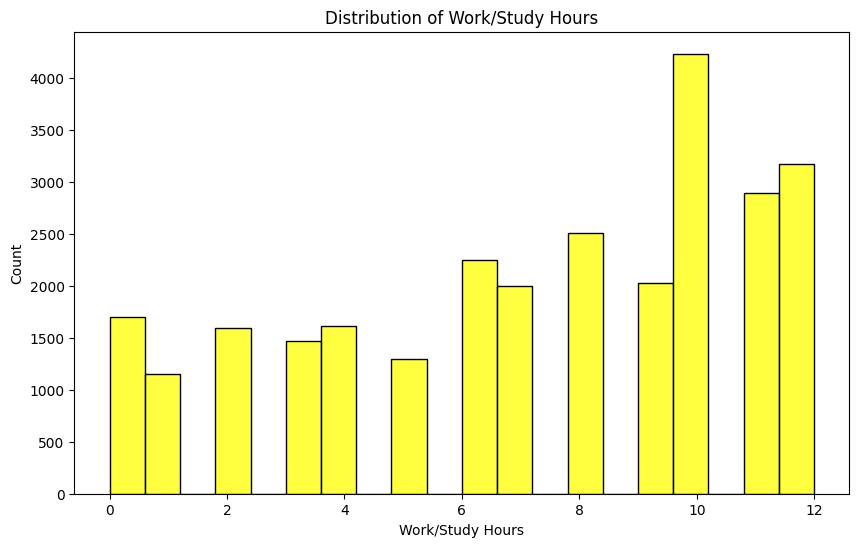

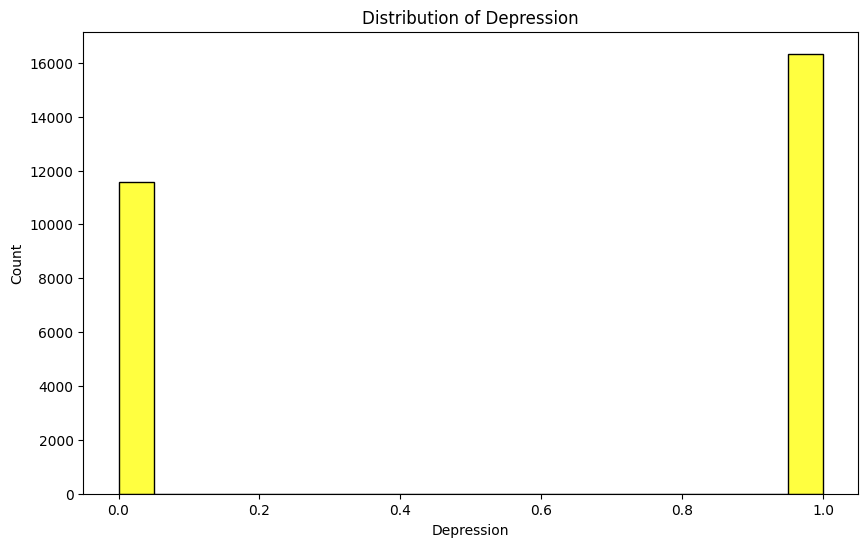

In [57]:
numeric_col=df.select_dtypes(include=['int64','float64']).columns
for col in numeric_col:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col],bins=20,color='yellow')
    plt.title(f'Distribution of {col}')
   
    plt.show()

6.HANDLING CATEGORIAL DATA

ENCODING

In [58]:
from sklearn.preprocessing import OrdinalEncoder
category=[['Healthy', 'Moderate', 'Unhealthy', 'Others']]
orden=OrdinalEncoder(categories=category)
new_df=df.copy()
df['Dietary Habits']=orden.fit_transform(df[['Dietary Habits']]).astype('int')
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,5.0,8.97,2.0,'5-6 hours',0,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24,Bangalore,2.0,5.90,5.0,'5-6 hours',1,BSc,No,3.0,2.0,Yes,0
2,Male,31,Srinagar,3.0,7.03,5.0,'Less than 5 hours',0,BA,No,9.0,1.0,Yes,0
3,Female,28,Varanasi,3.0,5.59,2.0,'7-8 hours',1,BCA,Yes,4.0,5.0,Yes,1
4,Female,25,Jaipur,4.0,8.13,3.0,'5-6 hours',1,M.Tech,Yes,1.0,1.0,No,0


In [59]:
col=['City','Sleep Duration', 'Degree']
for i in col:
       mapping={value:idx for idx,value in enumerate(df[i].unique())}
       df[i]=df[i].map(mapping)
df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,0,5.0,8.97,2.0,0,0,0,Yes,3.0,1.0,No,1
1,Female,24,1,2.0,5.90,5.0,0,1,1,No,3.0,2.0,Yes,0
2,Male,31,2,3.0,7.03,5.0,1,0,2,No,9.0,1.0,Yes,0
3,Female,28,3,3.0,5.59,2.0,2,1,3,Yes,4.0,5.0,Yes,1
4,Female,25,4,4.0,8.13,3.0,0,1,4,Yes,1.0,1.0,No,0


In [60]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1}).astype('int')
df['Have you ever had suicidal thoughts ?']=df['Have you ever had suicidal thoughts ?'].map({'Yes':1,'No':0}).astype('int')
df['Family History of Mental Illness']=df['Family History of Mental Illness'].map({'Yes':1,'No':0}).astype('int')
df.head()


,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33,0,5.0,8.97,2.0,0,0,0,1,3.0,1.0,0,1
1,1,24,1,2.0,5.90,5.0,0,1,1,0,3.0,2.0,1,0
2,0,31,2,3.0,7.03,5.0,1,0,2,0,9.0,1.0,1,0
3,1,28,3,3.0,5.59,2.0,2,1,3,1,4.0,5.0,1,1
4,1,25,4,4.0,8.13,3.0,0,1,4,1,1.0,1.0,0,0


BOXPLOT FOR RELATIONSHIP AND OUTLIER DETECTION

<Axes: xlabel='Age', ylabel='Depression'>

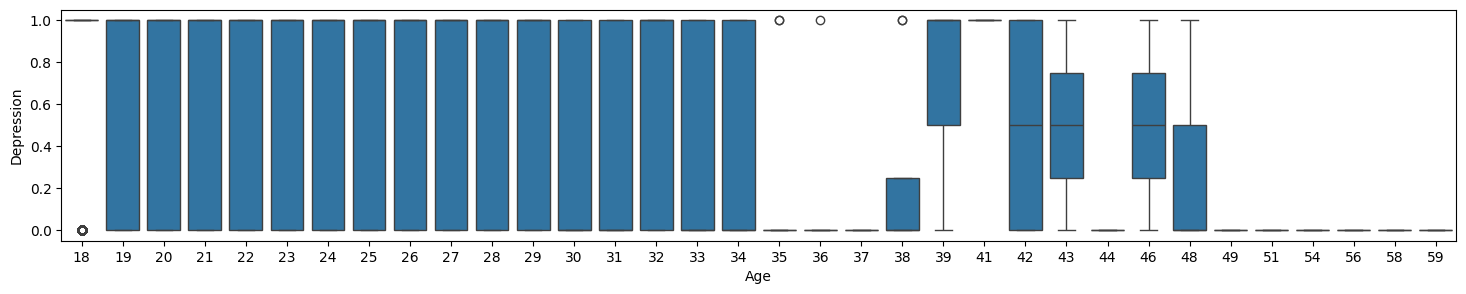

In [61]:
#check relationship
plt.figure(figsize=(18,3))
sns.boxplot(data=df,y='Depression',x='Age')

<Axes: xlabel='Gender', ylabel='Academic Pressure'>

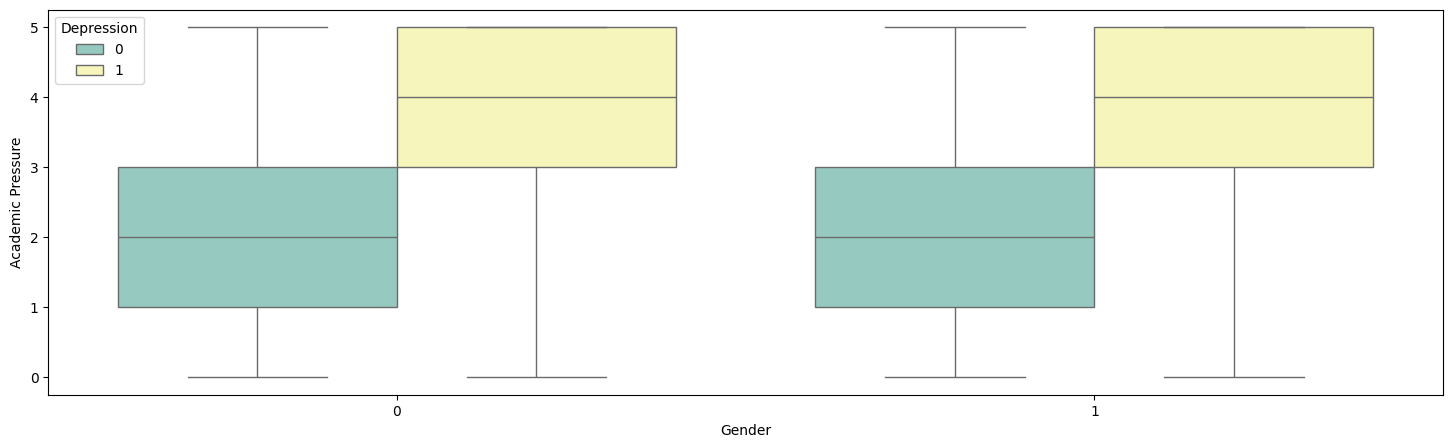

In [62]:
plt.figure(figsize=(18,5))
sns.boxplot(data=df,y='Academic Pressure',x='Gender', hue='Depression', palette='Set3')

In [63]:
df.groupby('Depression')['Gender'].value_counts().sort_values(ascending=False)

Depression  Gender
1           0         9115
            1         7221
0           0         6432
            1         5133
Name: count, dtype: int64

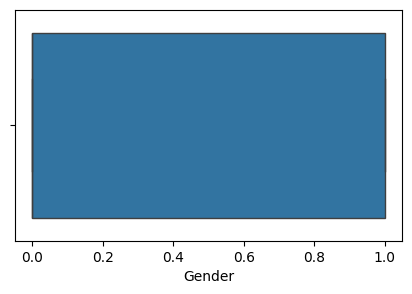

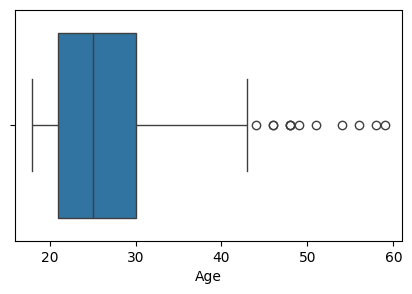

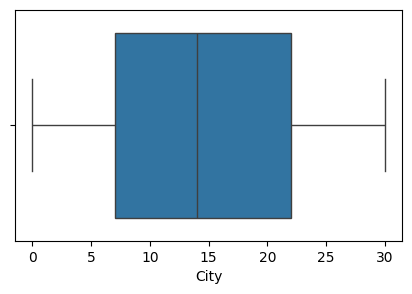

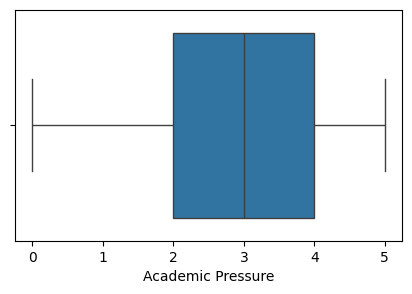

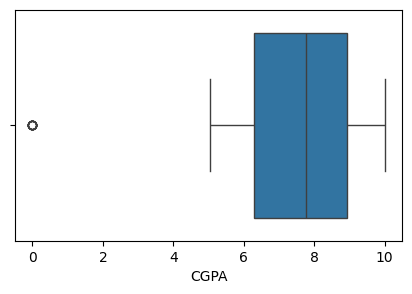

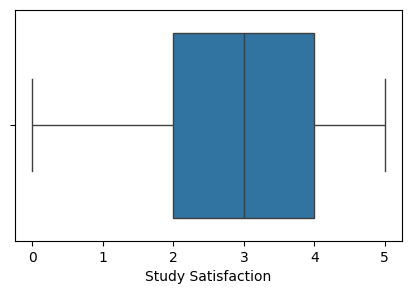

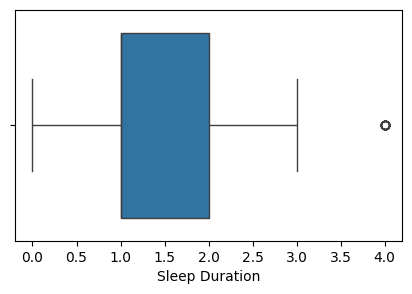

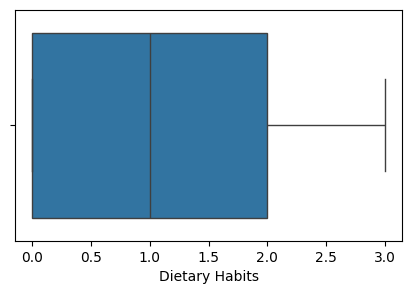

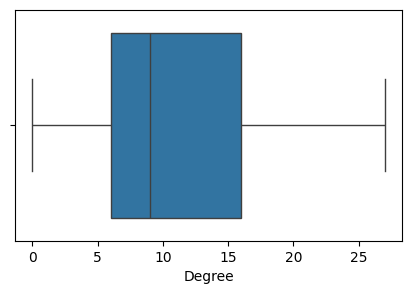

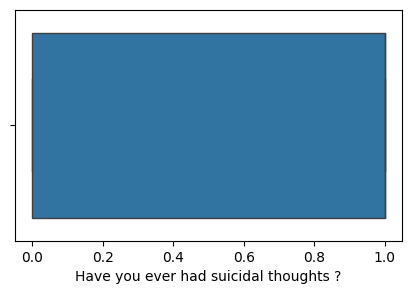

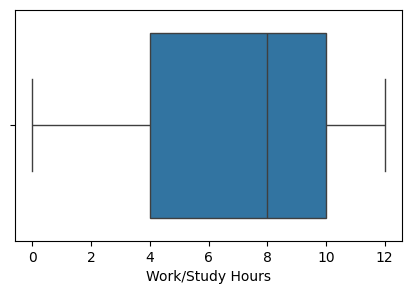

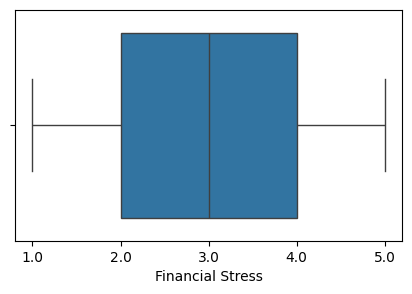

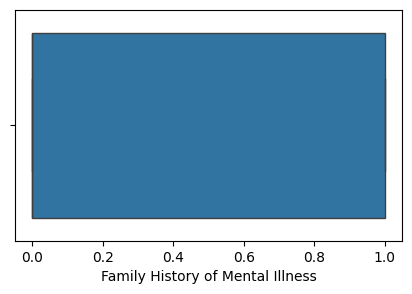

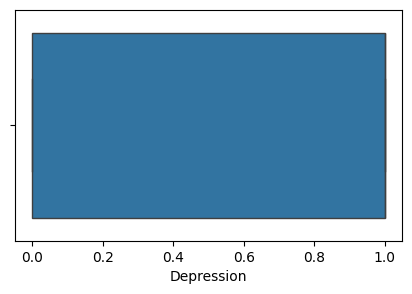

In [64]:
#detecting outliers
for i in df:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df,x=i)
    plt.show()

FROM VISUALISATION UNDERSTOOD THAT SOME OF THE COLUMNS CONTAIN OUTLIERS
AGE,CGPA,CITY,SLEEP DURATION


REMOVE OUTLIERS IN AGE (Since dataset is about students, ages above 43  are likely non-traditional students or potential data errors)

In [65]:
df=df[df['Age']<=43]

CGPA

In [66]:
Q1=df['CGPA'].quantile(0.25)
Q3=df['CGPA'].quantile(0.75)
IQR=Q3-Q1
upper=Q3+(1.5*IQR)
lower=Q1-(1.5*IQR)
df=df[(df['CGPA']>=lower) & (df['CGPA']<=upper)]

CITY(Group rare cities to 'other' category)

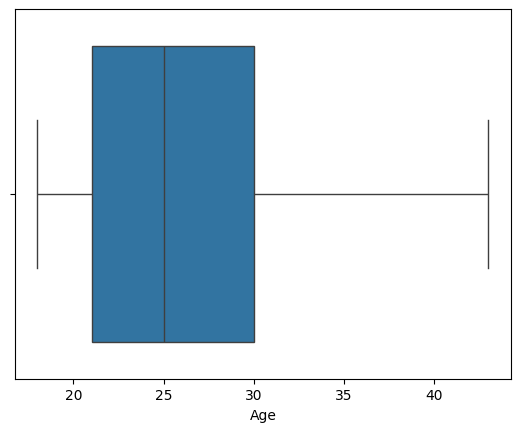

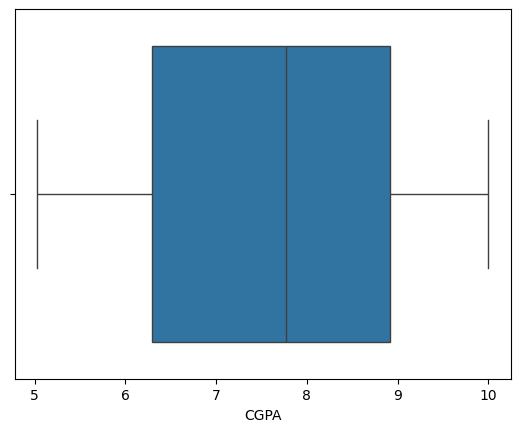

In [67]:
for i in ['Age', 'CGPA']:
    sns.boxplot(data=df, x=i)
    plt.show()


In [68]:
df

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,33,0,5.0,8.97,2.0,0,0,0,1,3.0,1.0,0,1
1,1,24,1,2.0,5.90,5.0,0,1,1,0,3.0,2.0,1,0
2,0,31,2,3.0,7.03,5.0,1,0,2,0,9.0,1.0,1,0
3,1,28,3,3.0,5.59,2.0,2,1,3,1,4.0,5.0,1,1
4,1,25,4,4.0,8.13,3.0,0,1,4,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,1,27,18,5.0,5.75,5.0,0,2,6,1,7.0,1.0,1,0
27897,0,27,19,2.0,9.40,3.0,1,0,11,0,0.0,3.0,1,0
27898,0,31,28,3.0,6.61,4.0,0,2,17,0,12.0,2.0,0,0
27899,1,18,19,5.0,6.88,2.0,1,0,6,1,10.0,5.0,0,1


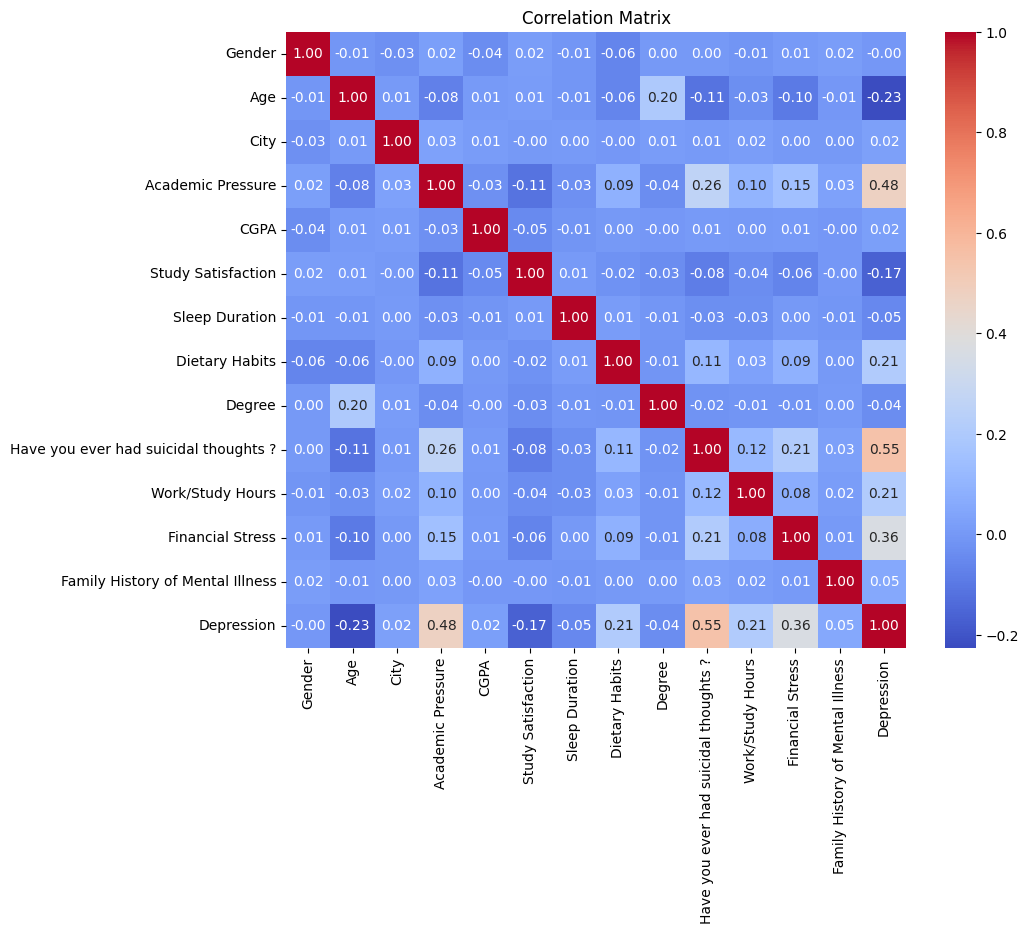

In [69]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

SPLITTING TRAIN AND TEST DATA

In [70]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,random_state=3,test_size=0.2)
train

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
23435,1,29,3,2.0,8.73,1.0,1,0,11,0,0.0,1.0,1,0
10576,0,21,27,2.0,9.33,1.0,1,1,2,0,11.0,3.0,1,1
2035,1,24,11,4.0,9.04,3.0,3,2,21,1,6.0,3.0,1,1
25269,1,28,23,4.0,6.78,4.0,0,2,21,1,11.0,5.0,1,1
13350,0,29,24,1.0,5.64,3.0,2,0,16,0,7.0,4.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15302,0,20,28,3.0,5.16,1.0,2,2,6,1,10.0,4.0,1,1
26262,0,27,21,3.0,9.54,2.0,0,0,18,1,11.0,5.0,1,1
11522,1,25,14,3.0,6.78,1.0,3,2,1,1,3.0,4.0,1,1
1688,0,20,25,4.0,7.83,3.0,2,2,6,1,0.0,2.0,1,1


In [71]:
test

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
148,0,30,19,5.0,5.67,3.0,1,1,23,1,4.0,1.0,0,1
13911,1,23,14,3.0,6.37,5.0,1,2,11,1,9.0,4.0,1,1
17750,1,31,23,1.0,8.74,4.0,2,2,16,1,12.0,1.0,0,0
25667,0,32,22,2.0,8.91,1.0,3,1,12,0,0.0,2.0,0,0
6637,0,28,20,4.0,8.73,2.0,0,2,3,1,6.0,5.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9346,0,21,29,5.0,5.64,5.0,1,2,21,1,4.0,3.0,0,1
8702,1,21,24,1.0,9.17,5.0,1,1,14,1,9.0,4.0,1,1
12164,1,28,16,1.0,7.09,1.0,3,1,21,0,9.0,3.0,1,0
9107,0,20,7,3.0,8.58,4.0,1,1,6,0,12.0,1.0,1,0


FEATURE TRANSFORMATION AND SCALING ( PERFORMING SEPERATELY TO AVOID DATA LEAKAGE )

TRAIN SET

In [72]:
min=train['Age'].min()
max=train['Age'].max()
train['Age']=(train['Age']-min)/(max-min)
train


,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
23435,1,0.44,3,2.0,8.73,1.0,1,0,11,0,0.0,1.0,1,0
10576,0,0.12,27,2.0,9.33,1.0,1,1,2,0,11.0,3.0,1,1
2035,1,0.24,11,4.0,9.04,3.0,3,2,21,1,6.0,3.0,1,1
25269,1,0.40,23,4.0,6.78,4.0,0,2,21,1,11.0,5.0,1,1
13350,0,0.44,24,1.0,5.64,3.0,2,0,16,0,7.0,4.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15302,0,0.08,28,3.0,5.16,1.0,2,2,6,1,10.0,4.0,1,1
26262,0,0.36,21,3.0,9.54,2.0,0,0,18,1,11.0,5.0,1,1
11522,1,0.28,14,3.0,6.78,1.0,3,2,1,1,3.0,4.0,1,1
1688,0,0.08,25,4.0,7.83,3.0,2,2,6,1,0.0,2.0,1,1


In [73]:
# col=['City']
# train[col]=(train[col]-train[col].min())/(train[col].max()-train[col].min())
# train


In [74]:
from sklearn.preprocessing import StandardScaler

cols=['CGPA', 'Work/Study Hours','Academic Pressure', 'Study Satisfaction', 'Financial Stress']
scaler=StandardScaler()
train[cols]=scaler.fit_transform(train[cols])
train

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
23435,1,0.44,3,-0.829313,0.733866,-1.431821,1,0,11,0,-1.934127,-1.489911,1,0
10576,0,0.12,27,-0.829313,1.142829,-1.431821,1,1,2,0,1.039898,-0.097892,1,1
2035,1,0.24,11,0.617008,0.945164,0.039684,3,2,21,1,-0.311932,-0.097892,1,1
25269,1,0.40,23,0.617008,-0.595262,0.775436,0,2,21,1,1.039898,1.294127,1,1
13350,0,0.44,24,-1.552474,-1.372291,0.039684,2,0,16,0,-0.041566,0.598118,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15302,0,0.08,28,-0.106153,-1.699461,-1.431821,2,2,6,1,0.769532,0.598118,1,1
26262,0,0.36,21,-0.106153,1.285966,-0.696068,0,0,18,1,1.039898,1.294127,1,1
11522,1,0.28,14,-0.106153,-0.595262,-1.431821,3,2,1,1,-1.123029,0.598118,1,1
1688,0,0.08,25,0.617008,0.120422,0.039684,2,2,6,1,-1.934127,-0.793902,1,1


TEST SET

In [75]:
test

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
148,0,30,19,5.0,5.67,3.0,1,1,23,1,4.0,1.0,0,1
13911,1,23,14,3.0,6.37,5.0,1,2,11,1,9.0,4.0,1,1
17750,1,31,23,1.0,8.74,4.0,2,2,16,1,12.0,1.0,0,0
25667,0,32,22,2.0,8.91,1.0,3,1,12,0,0.0,2.0,0,0
6637,0,28,20,4.0,8.73,2.0,0,2,3,1,6.0,5.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9346,0,21,29,5.0,5.64,5.0,1,2,21,1,4.0,3.0,0,1
8702,1,21,24,1.0,9.17,5.0,1,1,14,1,9.0,4.0,1,1
12164,1,28,16,1.0,7.09,1.0,3,1,21,0,9.0,3.0,1,0
9107,0,20,7,3.0,8.58,4.0,1,1,6,0,12.0,1.0,1,0


In [76]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
col=['Age']
test[col] = scaler.fit_transform(test[col])
test

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
148,0,0.48,19,5.0,5.67,3.0,1,1,23,1,4.0,1.0,0,1
13911,1,0.20,14,3.0,6.37,5.0,1,2,11,1,9.0,4.0,1,1
17750,1,0.52,23,1.0,8.74,4.0,2,2,16,1,12.0,1.0,0,0
25667,0,0.56,22,2.0,8.91,1.0,3,1,12,0,0.0,2.0,0,0
6637,0,0.40,20,4.0,8.73,2.0,0,2,3,1,6.0,5.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9346,0,0.12,29,5.0,5.64,5.0,1,2,21,1,4.0,3.0,0,1
8702,1,0.12,24,1.0,9.17,5.0,1,1,14,1,9.0,4.0,1,1
12164,1,0.40,16,1.0,7.09,1.0,3,1,21,0,9.0,3.0,1,0
9107,0,0.08,7,3.0,8.58,4.0,1,1,6,0,12.0,1.0,1,0


In [77]:
from sklearn.preprocessing import StandardScaler

cols=['CGPA', 'Work/Study Hours','Academic Pressure', 'Study Satisfaction', 'Financial Stress']
scaler=StandardScaler()
test[cols]=scaler.fit_transform(test[cols])
test

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
148,0,0.48,19,1.367114,-1.382165,0.045305,1,1,23,1,-0.848355,-1.482665,0,1
13911,1,0.20,14,-0.090165,-0.900773,1.509780,1,2,11,1,0.488226,0.599963,1,1
17750,1,0.52,23,-1.547444,0.729082,0.777543,2,2,16,1,1.290174,-1.482665,0,0
25667,0,0.56,22,-0.818805,0.845991,-1.419170,3,1,12,0,-1.917619,-0.788455,0,0
6637,0,0.40,20,0.638474,0.722205,-0.686932,0,2,3,1,-0.313722,1.294172,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9346,0,0.12,29,1.367114,-1.402796,1.509780,1,2,21,1,-0.848355,-0.094246,0,1
8702,1,0.12,24,-1.547444,1.024794,1.509780,1,1,14,1,0.488226,0.599963,1,1
12164,1,0.40,16,-1.547444,-0.405627,-1.419170,3,1,21,0,0.488226,-0.094246,1,0
9107,0,0.08,7,-0.090165,0.619050,0.777543,1,1,6,0,1.290174,-1.482665,1,0


SPLITTING TRAIN SET TO TRAIN AND VALIDATION SETS

In [78]:
train,validation = train_test_split(train , random_state=3 , test_size = 0.2)
train

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
923,0,0.44,10,0.617008,-0.452125,-1.431821,0,2,13,1,-1.663761,-0.793902,0,1
18437,0,0.48,29,0.617008,-1.372291,1.511189,1,0,22,1,-0.852664,1.294127,0,0
4147,1,0.12,4,-1.552474,1.572240,-1.431821,0,2,5,0,-0.852664,0.598118,1,0
5273,1,0.04,7,-1.552474,-1.283683,-1.431821,3,1,6,1,-0.311932,1.294127,1,1
4360,1,0.20,11,-0.106153,0.154503,1.511189,1,1,12,1,1.310264,-1.489911,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10614,0,0.48,4,-0.106153,0.195399,-1.431821,0,2,26,1,-0.582298,-0.097892,1,1
288,1,0.60,5,-0.829313,0.631626,0.775436,1,0,6,0,0.499166,-0.097892,0,0
9743,0,0.36,1,1.340169,-0.867904,-0.696068,1,2,25,0,1.039898,1.294127,1,1
14345,0,0.16,24,1.340169,-1.753990,-0.696068,0,2,3,1,0.769532,-0.097892,1,1


In [79]:
validation

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
3700,1,0.36,5,-1.552474,-1.147362,0.039684,0,0,24,1,-1.934127,-1.489911,0,0
23251,0,0.52,11,0.617008,-1.358659,0.775436,3,0,8,1,1.039898,-0.793902,0,1
19633,0,0.60,3,0.617008,0.577097,0.039684,2,1,4,0,-1.663761,0.598118,0,0
27022,0,0.28,22,-1.552474,-0.274908,0.775436,0,0,10,0,1.310264,-0.097892,1,0
2337,0,0.04,15,-0.106153,1.183725,-0.696068,1,2,6,1,1.310264,1.294127,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7980,1,0.12,1,-0.829313,-0.343069,1.511189,0,0,15,1,-1.123029,-0.793902,0,1
181,1,0.60,28,1.340169,0.290823,0.775436,3,1,6,0,0.499166,-1.489911,1,1
16948,0,0.48,6,-1.552474,1.544975,-0.696068,2,0,16,0,-1.393395,1.294127,1,0
4358,1,0.12,11,1.340169,1.551791,-1.431821,1,1,15,1,-0.582298,1.294127,1,1


DATASET READY FOR MODEL

In [80]:
train.to_csv('Train set.csv')
validation.to_csv('Validation set.csv')
test.to_csv('Test set.csv')